# COVID-19 INDIA Matplotlib Overview

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')
states=dft_cases['states'].unique()
df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [3]:
#hide
list=df['Date'].unique()
recent_dates1=list[153:]
recent_dates = []
for date in recent_dates1:
    if int(date[5])==0 and int(date[6])==7:
        date2 = f'{date[8]}{date[9]}-Jul-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==8:
        date2 = f'{date[8]}{date[9]}-Aug-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==9:
        date2 = f'{date[8]}{date[9]}-Sep-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==0:
        date2 = f'{date[8]}{date[9]}-Oct-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Nov-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Dec-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Jan-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Feb-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==3:
        date2 = f'{date[8]}{date[9]}-Mar-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==4:
        date2 = f'{date[8]}{date[9]}-Apr-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==5:
        date2 = f'{date[8]}{date[9]}-May-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==6:
        date2 = f'{date[8]}{date[9]}-Jun-{date[2]}{date[3]}'
        recent_dates.append(date2)

In [4]:
#hide
df2=df.groupby('Date')

In [5]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Confirmed
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_cases[recent_dates[i]]=cs    



In [6]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Deceased
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_deaths[recent_dates[i]]=cs    


In [7]:
#hide

dft_cases.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,14-Aug-21,15-Aug-21,16-Aug-21,17-Aug-21,18-Aug-21,19-Aug-21,20-Aug-21,21-Aug-21,22-Aug-21,23-Aug-21
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,7548,7548,7549,7549,7550,7553,7556,7557,7557,7559
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,1992191,1993697,1994606,1995669,1997102,1998603,2000038,2001255,2002340,2003342
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,51300,51348,51513,51655,51799,51919,52044,52165,52214,52308
3,Assam,0,0,0,0,0,0,0,0,0,...,579488,579899,580657,581398,582037,582750,583458,584098,584434,585134
4,Bihar,0,0,0,0,0,0,0,0,2,...,725455,725483,725497,725518,725534,725549,725560,725568,725588,725596


In [8]:
#hide
dt_today = dft_cases.columns[-1]
dt_yday = dft_cases.columns[-2]

In [9]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [10]:
#hide
df_table= pd.DataFrame(dft_cases['states'])
df_table = df_table.set_index('states')

df_table['Cases'] = dfc_cases.values
df_table['Deaths'] = dfc_deaths.values
df_table['PCases'] = dfp_cases.values
df_table['PDeaths'] = dfp_deaths.values
df_table

,Cases,Deaths,PCases,PDeaths
states,,,,
Andaman and Nicobar Islands,7559,129,7557,129
Andhra Pradesh,2003342,13735,2002340,13723
Arunachal Pradesh,52308,259,52214,259
Assam,585134,5587,584434,5576
Bihar,725596,9650,725588,9649
Chandigarh,65068,812,65066,812
Daman and Diu,0,0,0,0
Delhi,1437334,25079,1437317,25079
Goa,173221,3186,173164,3185


In [11]:
#hide
df_table = df_table.sort_values(by=['Cases','Deaths'],ascending = [False,False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,6428294,136067,6424651,135962
1,Kerala,3814305,19494,3814305,19494
2,Karnataka,2939767,37155,2938616,37145
3,Tamil Nadu,2602489,34734,2600885,34709
4,Andhra Pradesh,2003342,13735,2002340,13723


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,6428294,136067,6424651,135962,3643,105,2.12
1,Kerala,3814305,19494,3814305,19494,0,0,0.51
2,Karnataka,2939767,37155,2938616,37145,1151,10,1.26
3,Tamil Nadu,2602489,34734,2600885,34709,1604,25,1.33
4,Andhra Pradesh,2003342,13735,2002340,13723,1002,12,0.69


In [14]:
#hide
summary=dict()
summary['updated']=dft_cases.columns[-1]
summary['since']=dft_cases.columns[-2]
summary['Cases']=df_table['Cases'].values.sum()
summary['Deaths']=df_table['Deaths'].values.sum()
summary['PCases']=df_table['PCases'].values.sum()
summary['PDeaths']=df_table['PDeaths'].values.sum()
summary['Cases (+)']=df_table['Cases (+)'].values.sum()
summary['Deaths (+)']=df_table['Deaths (+)'].values.sum()
summary

{'updated': '23-Aug-21',
 'since': '22-Aug-21',
 'Cases': 29957589,
 'Deaths': 404621,
 'PCases': 29947094,
 'PDeaths': 404424,
 'Cases (+)': 10495,
 'Deaths (+)': 197}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = []
for i in range(len(dft_cases.columns)):
    dt_cols.append(dft_cases.columns[i])
dt_cols = dt_cols[1:]


In [18]:


#hide
#dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_yday, ascending = False,inplace = True)

In [19]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,14-Aug-21,15-Aug-21,16-Aug-21,17-Aug-21,18-Aug-21,19-Aug-21,20-Aug-21,21-Aug-21,22-Aug-21,23-Aug-21
states,,,,,,,,,,,,,,,,,,,,,
Kerala,0,5,3,0,0,1,12,12,15,28,...,19451,18582,12294,21613,21427,21116,20224,17106,10402,0
Maharashtra,0,18,6,3,3,4,4,12,10,23,...,5787,4797,4145,4408,5132,5225,4365,4575,4141,3643
Chandigarh,0,0,0,0,0,1,4,0,1,1,...,4,1,2,4,10,6,5,6,3004,2
Tamil Nadu,0,0,0,0,1,1,0,3,3,3,...,1916,1896,1851,1804,1797,1702,1668,1652,1630,1604
Karnataka,0,0,1,2,5,1,0,5,6,7,...,1632,1431,1065,1298,1365,1432,1453,1350,1189,1151


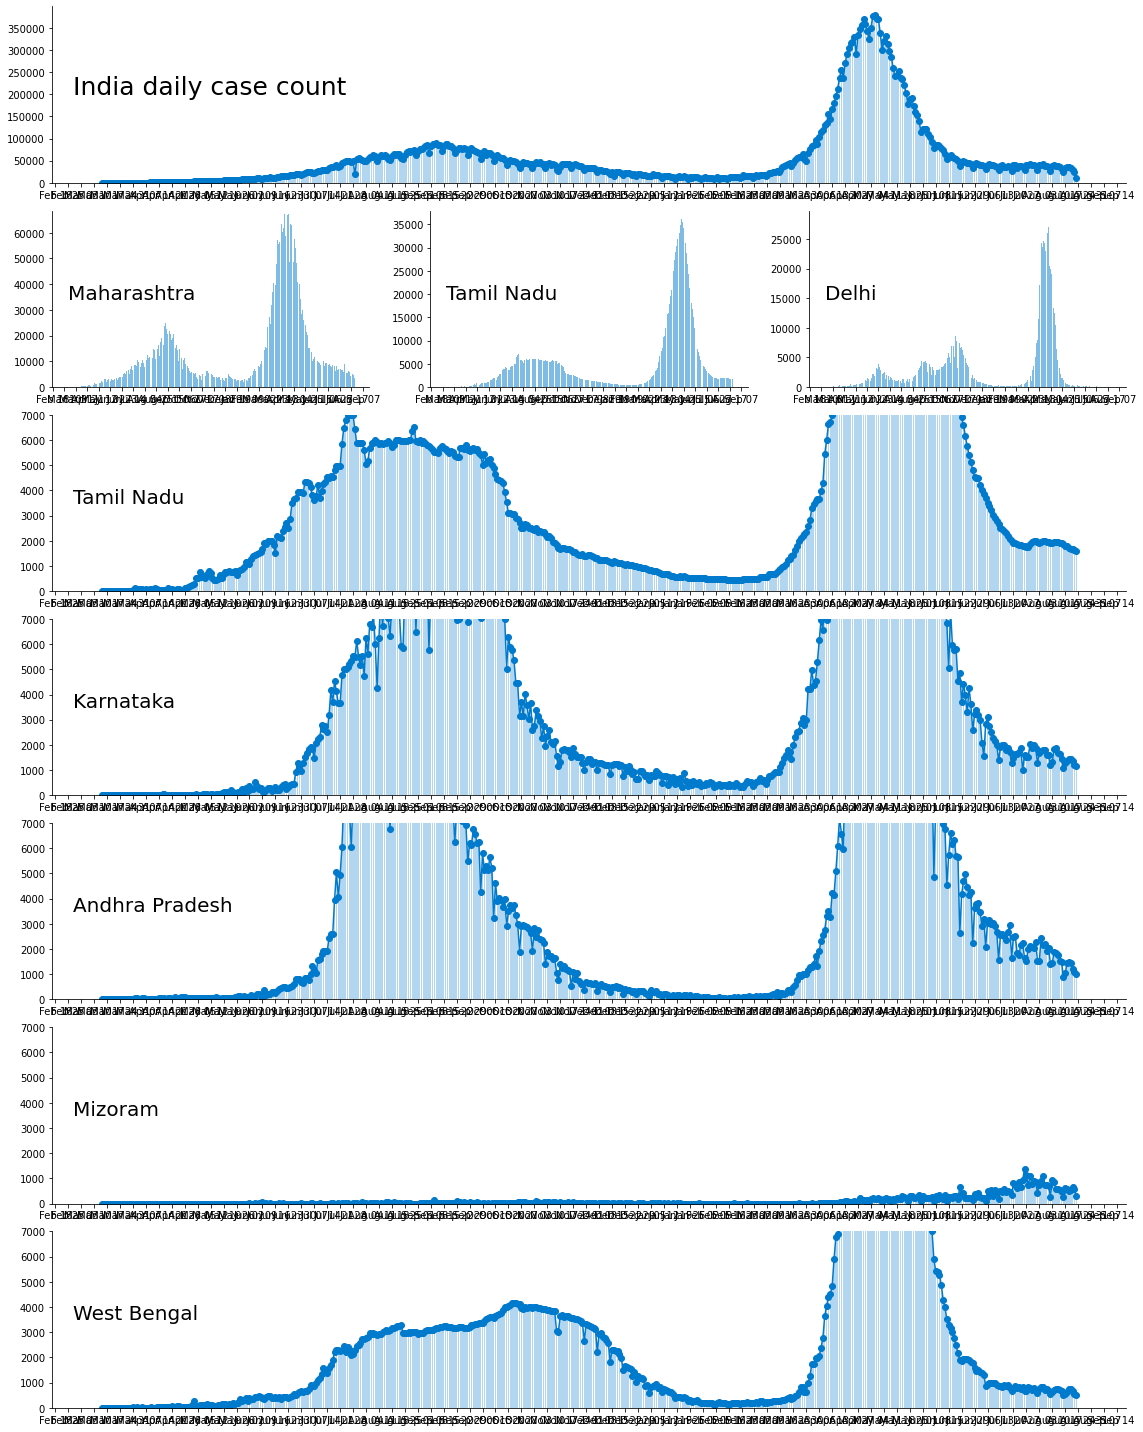

In [20]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [21]:
#hide_input
print(df_table.to_string(index=False))

                      states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                 Maharashtra  6428294  136067  6424651   135962       3643         105           2.12
                      Kerala  3814305   19494  3814305    19494          0           0           0.51
                   Karnataka  2939767   37155  2938616    37145       1151          10           1.26
                  Tamil Nadu  2602489   34734  2600885    34709       1604          25           1.33
              Andhra Pradesh  2003342   13735  2002340    13723       1002          12           0.69
               Uttar Pradesh  1709126   22792  1709119    22792          7           0           1.33
                 West Bengal  1543496   18371  1542986    18364        510           7           1.19
                       Delhi  1437334   25079  1437317    25079         17           0           1.74
                   Rajasthan   954030    8954   954023     8954          7        